In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [4]:
"""We want to predict whether or not a passenger would survive the Titanic based upon certain characteristics including of age, sex, class, fare, and familial relationships."""

'We want to predict whether or not a passenger would survive the Titanic based upon certain characteristics including of age, sex, class, fare, and familial relationships.'

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv('/home/jupyter-1000790/Titanic/data/titanic.csv')

"""Gathered the data from the folder, and used pandas and seaboard to manipulate it."""

'Gathered the data from the folder, and used pandas and seaboard to manipulate it.'

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

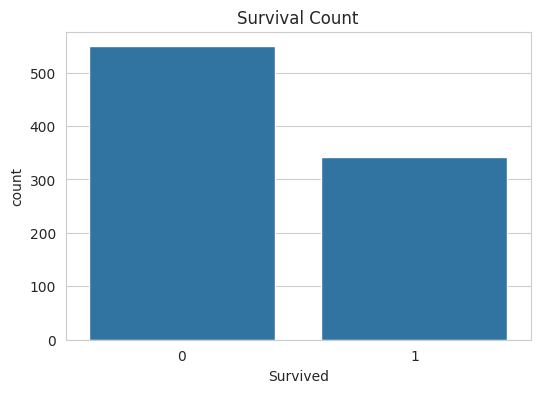

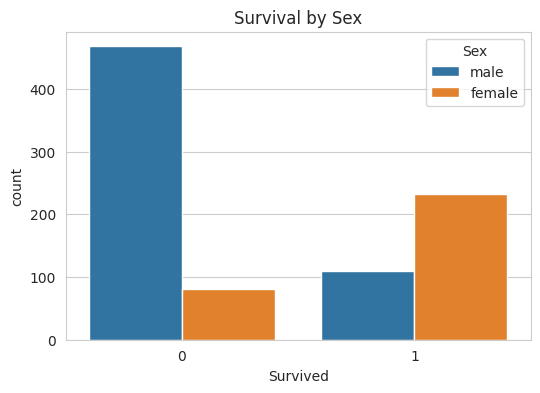

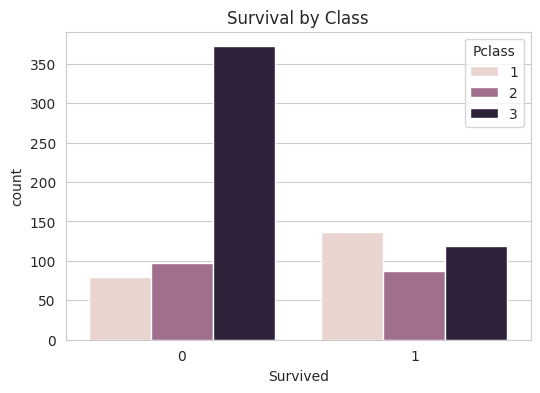

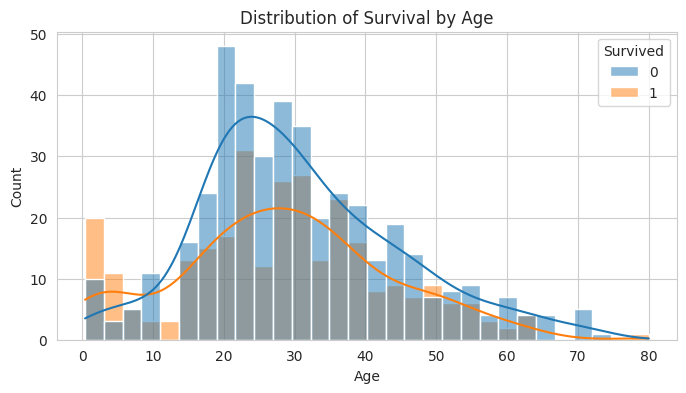

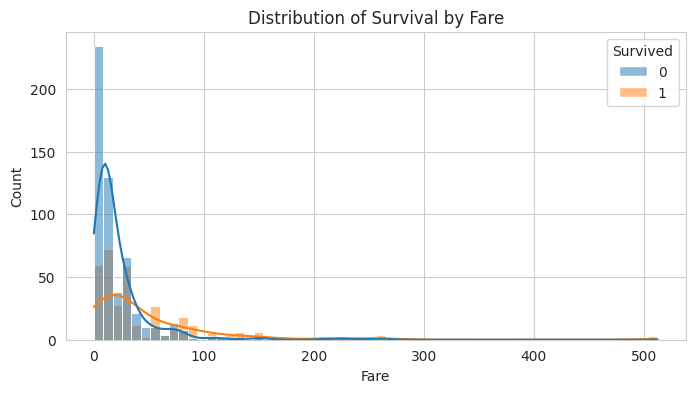

In [6]:




plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Sex")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Class")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Distribution of Survival by Age")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, bins=60)
plt.title("Distribution of Survival by Fare")
plt.show()    

# 4.Prepare the Data


Apply any data transformations and explain what and why


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Choosing certain features which played into the likelihood of survival

features = ['Pclass','Sex','Age','Fare',
            'SibSp','Parch']
x = df[features]
y = df['Survived']

#Ensure that missing values don't mess up the model
x['Age'].fillna(x['Age'].median(), inplace=True)
x['Fare'].fillna(x['Fare'].median(), inplace=True)

#Make the categorical variable
x['Sex'] = LabelEncoder().fit_transform(x['Sex'])

#Training the model with the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


/tmp/ipykernel_1604596/235909916.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['Age'].fillna(x['Age'].median(), inplace=True)
/tmp/ipykernel_1604596/235909916.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age'].fillna(x['Age'].median(), inplace=True)
/tmp/ipykernel_1604596/235909916.py:13: FutureWarning: A value is trying to

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Training the model via a logistic regression.
model = LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

#Printing the evaluation of the model's accuracy with different metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#The Logistic Regression model yielded an accuracy of 81% when determining whether the person survived the Titanic

Accuracy:  0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



' The Logistic Regression model yielded an accuracy of 81% when determining whether the person survived the Titanic'

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


In [18]:
"""The steps to achieve the best results possible consist of cleaning the data through filling the missing values.
Another step has to do with using one-hot encoding to convert things like sex into a numeric form.
Another step to fine tune the model has to do with standardization of the data through making measured values on a 
similar scale.
This of course is the best result possible to be achieved with a logistic regression model"""




'The steps to achieve the best results possible consist of cleaning the data through filling the missing values.\nAnother step has to do with using one-hot encoding to convert things like sex into a numeric form.\nAnother step to fine tune the model has to do with standardization of the data through making measured values on a \nsimilar scale.\nThis of course is the best result possible to be achieved with a logistic regression model'

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


In [ ]:
"""From this project, I deduced a few things. One, that most people from the Titanic didn't survive. I also learned that there seemed to be a few 
patterns dictating likelihood of survival. These patterns included gender and class, since women and higher-class passegners had better survival odds. 
Additionally, younger children had a higher survival rate too. These findings correlate with cultural norms where women and children are looked after 
first, then men. The approach taken to uncovering this data was layered into roughly two sections. The first, was to play around with the data, and 
reveal the variables which had a relationship and actually impacted the classification. The second layer, was to create a logistic regression to 
predict whether someone survived. This logistic regression model had an accuracy of 81% after running it a few times."""

# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [20]:
def inference(params, model):
    return model.predict([params])[0]

sample_passenger = [1,0,30,100,0,0] #These parameters are class, sex, age, fare, sibsp, and parch in that order
print("Prediction (1=Survived, 0=Died): ", inference(sample_passenger, model))

Prediction (1=Survived, 0=Died):  1


/opt/tljh/user/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
